<a href="https://colab.research.google.com/github/woodstone10/data-intelligence-lab/blob/main/QPSK_modulation_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QPSK modultion clustering - K-Means vs. DBSCAN 

---

K-Means gets the clustering, which looks perfect.
Whereas, DBSCAN algorithm works well if all the clusters are dense enough, and they are well sepa‐
rated by low-density regions, that is low noise and high epsilon

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

## K-Means

K-Means clustering algorithm
- input: k is the number of clusters to predict k, X is train data, c is cluster name

Let’s train a K-Means clusterer on this dataset.
It will try to find each blob’s center and
assign each instance to the closest blob:

In [ ]:
def KMeans_(k, X, c):
    model = KMeans(n_clusters=k)
    model.fit(X)  # fitting the model to X
    centroids = model.cluster_centers_  # We can also take a look at the k centroids that the algorithm found:
    print(centroids)
    model.predict(X)  # predicting labels (y)
    df[c] = model.labels_
    print(df.head(10))

## DBSCAN

DBSCAN clustering algorithm
- input: e is epsilon, m is min_samples, X is train data, c is cluster name
    
For each instance, the algorithm counts how many instances are located within a
small distance ε (epsilon) from it. This region is called the instance’s ε-
neighborhood.
If an instance has at least min_samples instances in its ε-neighborhood (includ‐
ing itself), then it is considered a core instance. In other words, core instances are
those that are located in dense regions.

In [ ]:
def DBSCAN_(e, m, X, c):
    model = DBSCAN(eps=e, min_samples=m)
    model.fit(X)
    model.fit_predict(X)
    df[c] = model.labels_
    print(df.head(10))

## Data - QPSK (Quadrature Phase-Shift Keying) modulation generation

In [ ]:
def genQPSK(num_samples, noise_ratio):
    # https://pysdr.org/content/digital_modulation.html
    num_symbols = num_samples
    noise_power = noise_ratio/100
    x_int = np.random.randint(0, 4, num_symbols) # 0 to 3
    x_degrees = x_int*360/4.0 + 45 # 45, 135, 225, 315 degrees
    x_radians = x_degrees*np.pi/180.0 # sin() and cos() takes in radians
    x_symbols = np.cos(x_radians) + 1j*np.sin(x_radians) # this produces our QPSK complex symbols
    n = (np.random.randn(num_symbols) + 1j*np.random.randn(num_symbols))/np.sqrt(2) # AWGN with unity power
    r = x_symbols + n * np.sqrt(noise_power)
    plt.plot(np.real(r), np.imag(r), '.')
    plt.grid(True)
    plt.show() # you will find 4 blobs in form of QPSK
    return np.real(r), np.imag(r)

## Test #1 - 5% noise ratio

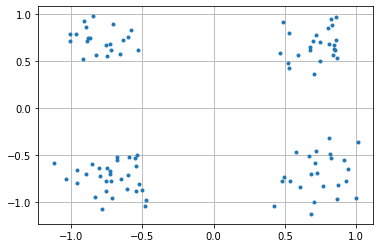

(100,) (100,)


In [ ]:
n_sample = 100
noise_ratio = 5 # noise ratio % >> /100
x, y = genQPSK(n_sample, noise_ratio)
print(x.shape, y.shape)
df = pd.DataFrame(columns=['x','y'])
for i in range(len(x)):
    df.loc[i] = [x[i], y[i]]
X = df.values

No handles with labels found to put in legend.


[[-0.71393204 -0.74400042]
 [ 0.72117132  0.66987741]
 [-0.79200645  0.72475884]
 [ 0.73932889 -0.70780711]]
          x         y  K-Means
0  0.466584  0.579708        1
1  0.814058 -0.494508        3
2 -0.501945 -0.871998        0
3  0.943437 -0.646400        3
4  0.496021 -0.729651        3
5  0.826259 -0.532956        3
6  0.852673  0.617336        1
7 -0.752311 -0.887173        0
8 -0.652823 -0.751032        0
9 -0.477463 -0.982184        0
          x         y  K-Means  DBSCAN
0  0.466584  0.579708        1       2
1  0.814058 -0.494508        3       0
2 -0.501945 -0.871998        0       1
3  0.943437 -0.646400        3       0
4  0.496021 -0.729651        3       0
5  0.826259 -0.532956        3       0
6  0.852673  0.617336        1       2
7 -0.752311 -0.887173        0       1
8 -0.652823 -0.751032        0       1
9 -0.477463 -0.982184        0       1


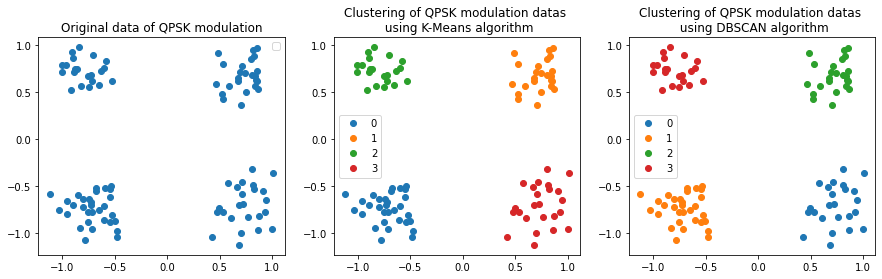

In [ ]:
KMeans_(4, X, 'K-Means')
DBSCAN_(0.3, 10, X, 'DBSCAN')

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(x,y)
plt.legend()
plt.title("Original data of QPSK modulation")
plt.subplot(1,3,2)
for name, group in df.groupby("K-Means"):
    plt.plot(group["x"], group["y"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Clustering of QPSK modulation datas \n using K-Means algorithm")
plt.subplot(1,3,3)
for name, group in df.groupby("DBSCAN"):
    plt.plot(group["x"], group["y"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Clustering of QPSK modulation datas \n using DBSCAN algorithm")
plt.show()

## Test #2 - 20% noise ration

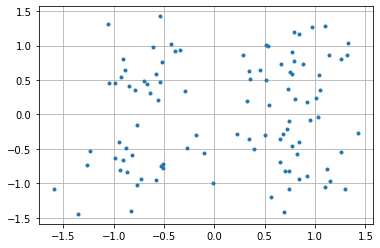

(100,) (100,)


In [ ]:
n_sample = 100
noise_ratio = 20 # noise ratio % >> /100
x, y = genQPSK(n_sample, noise_ratio)
print(x.shape, y.shape)
df = pd.DataFrame(columns=['x','y'])
for i in range(len(x)):
    df.loc[i] = [x[i], y[i]]
X = df.values

No handles with labels found to put in legend.


[[ 0.81028154 -0.61094395]
 [-0.76533047 -0.74647683]
 [ 0.78619585  0.6981137 ]
 [-0.67794824  0.66043717]]
          x         y  K-Means  DBSCAN
0  1.041390  0.574427        2       1
1  0.685452 -0.289500        0      -1
2  0.804232  0.219548        2      -1
3 -0.561528  0.216165        3       0
4  0.541015  0.135541        2      -1
5  1.027990 -0.036884        0      -1
6  0.949771 -0.077469        0      -1
7  0.774510  0.585967        2       1
8 -0.828212 -1.392857        1      -1
9 -0.344061  0.934600        3      -1
          x         y  K-Means  DBSCAN
0  1.041390  0.574427        2       1
1  0.685452 -0.289500        0      -1
2  0.804232  0.219548        2      -1
3 -0.561528  0.216165        3       0
4  0.541015  0.135541        2      -1
5  1.027990 -0.036884        0      -1
6  0.949771 -0.077469        0      -1
7  0.774510  0.585967        2       1
8 -0.828212 -1.392857        1      -1
9 -0.344061  0.934600        3      -1


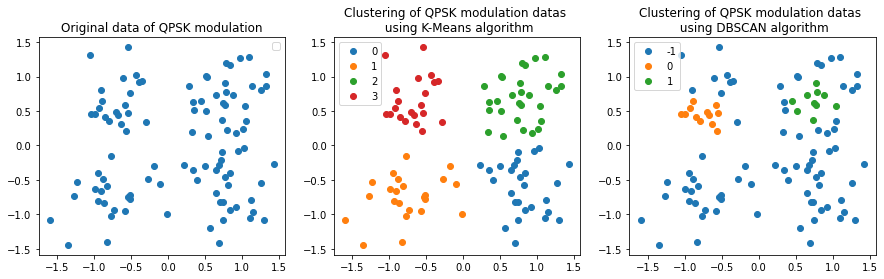

In [ ]:
KMeans_(4, X, 'K-Means')
DBSCAN_(0.3, 10, X, 'DBSCAN')

plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(x,y)
plt.legend()
plt.title("Original data of QPSK modulation")
plt.subplot(1,3,2)
for name, group in df.groupby("K-Means"):
    plt.plot(group["x"], group["y"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Clustering of QPSK modulation datas \n using K-Means algorithm")
plt.subplot(1,3,3)
for name, group in df.groupby("DBSCAN"):
    plt.plot(group["x"], group["y"], marker="o", linestyle="", label=name)
plt.legend()
plt.title("Clustering of QPSK modulation datas \n using DBSCAN algorithm")
plt.show()